## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [9]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/AAPL_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [ ]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [11]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [12]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
541611,Stocks Hitting 52-Week Highs,https://www.benzinga.com/news/14/09/4845983/st...,Lisa Levin,2014-09-12 00:00:00+00:00,MARA,0.000000,2014-09-12 00:00:00+00:00,25.302500,25.547501,25.270000,25.415001,22.566160,250504400,0.0,0.0
617283,Guggenheim Securities Initiates Coverage on Ar...,https://www.benzinga.com/news/15/03/5361230/gu...,Paul Quintaro,2015-03-26 00:00:00+00:00,ANET,0.000000,2015-03-26 00:00:00+00:00,30.690001,31.219999,30.650000,31.059999,27.807295,190291600,0.0,0.0
689794,"Earnings Scheduled For October 23, 2015",https://www.benzinga.com/news/earnings/15/10/5...,Monica Gerson,2015-10-23 00:00:00+00:00,LYB,0.000000,2015-10-23 00:00:00+00:00,29.174999,29.807501,29.082500,29.770000,26.884863,237467600,0.0,0.0
1020022,Sabby Management Reports New 8.81% Stake In Fi...,https://www.benzinga.com/general/hedge-funds/1...,Eddie Staley,2018-05-31 00:00:00+00:00,FCSC,0.136364,2018-05-31 00:00:00+00:00,46.805000,47.057499,46.535000,46.717499,44.359558,109931200,0.0,0.0
273937,Biogen Idec to Highlight Innovative Pipeline a...,https://www.benzinga.com/news/12/06/2661169/bi...,Allie Wickman,2012-06-12 00:00:00+00:00,BIIB,0.250000,2012-06-12 00:00:00+00:00,20.516430,20.593571,20.239286,20.577143,17.376881,435380400,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [13]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1324417, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [16]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y,0.000000,2009-04-27 00:00:00+00:00,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,NaN
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT,0.000000,2009-04-27 00:00:00+00:00,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.000000
2,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A,0.000000,2009-04-29 00:00:00+00:00,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,0.003287
3,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM,0.000000,2009-05-22 00:00:00+00:00,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,-0.021096
4,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,2009-05-27 00:00:00+00:00,RF,0.268182,2009-05-27 00:00:00+00:00,4.706429,4.820714,4.675357,4.751786,4.012765,646422000,0.0,0.0,0.086123


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [17]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.0009220945880360673, p-value: 0.2886099845714106


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [18]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.0005879609553436371, p-value: 0.4986317672843176


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [19]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.0005424146313346874, p-value: 0.4986246256889344


The results show the following correlation values between news sentiment and daily stock return for AAPL:

- **Pearson correlation:** 0.00092 (p-value: 0.2886)
- **Spearman correlation:** 0.00059 (p-value: 0.4986)
- **Kendall correlation:** 0.00054 (p-value: 0.4986)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

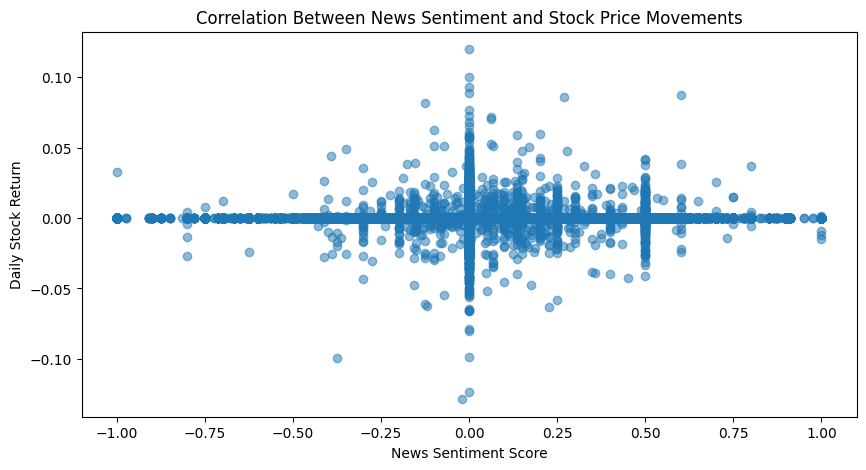

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

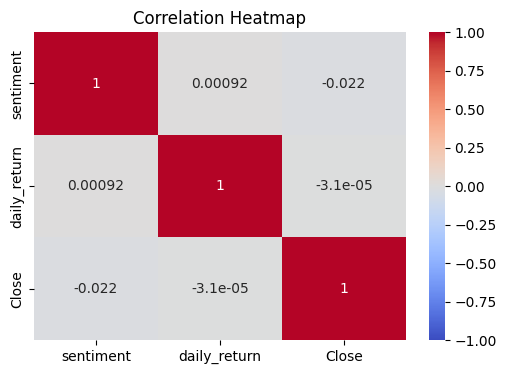

In [21]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()